<a href="https://colab.research.google.com/github/hamza3e/Minutiae-Extraction/blob/master/Minutiae_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/hamza3e/Minutiae-Extraction/master/fp1.bmp

--2020-03-08 16:14:11--  https://raw.githubusercontent.com/hamza3e/Minutiae-Extraction/master/fp1.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111670 (109K) [image/bmp]
Saving to: ‘fp1.bmp.2’

fp1.bmp.2           100%[===================>] 109.05K  --.-KB/s    in 0.03s   

2020-03-08 16:14:12 (3.52 MB/s) - ‘fp1.bmp.2’ saved [111670/111670]



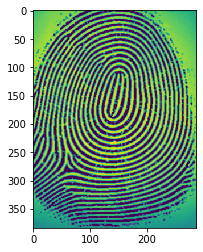

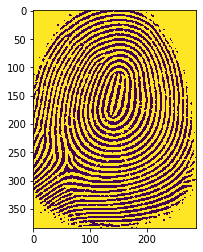

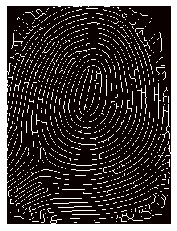

In [0]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io

"load image data"
Img_Original =  io.imread( 'fp1.bmp')      # Gray image, rgb images need pre-conversion

imgplot = plt.imshow(Img_Original)      #
plt.show()

from skimage.filters import threshold_otsu

Otsu_Threshold = threshold_otsu(Img_Original)   
BW_Original = Img_Original > Otsu_Threshold    # must set object region as 1, background region as 0 !

imgplot = plt.imshow(BW_Original)         #
plt.show()

from skimage.morphology import skeletonize
BW_Skeleton = skeletonize(BW_Original)

# BW_Skeleton = BW_Original
"Display the results"

imgplot = plt.imshow(BW_Skeleton)
imgplot.set_cmap('hot')
plt.axis('off')                                   
plt.savefig('skeleton.png')

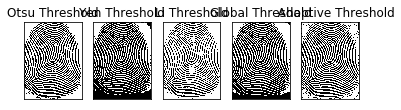

In [0]:
import cv2 as cv
import skimage.io as io
import numpy as np
from matplotlib import pyplot as plt

from skimage.filters import threshold_otsu
from skimage.filters import threshold_yen
from skimage.filters import threshold_li

img = io.imread('fp1.bmp')

Otsu_Threshold = threshold_otsu(img)   
th1 = img > Otsu_Threshold

Yen_Threshold = threshold_yen(img)   
th2 = img > Yen_Threshold

Li_Threshold = threshold_li(img)   
th3 = img > Li_Threshold

ret,th4 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th5 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)

# plot all the images and their histograms
images = [th1,
          th2,
          th3,
          th4,
          th5]
titles = ['Otsu Threshold',
          "Yen Threshold",
          "Li Threshold",
          "Global Threshold",
          "   Adaptive Threshold"]
for i in range(5):
    plt.subplot(1,5,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])

plt.savefig('thresholds.png')

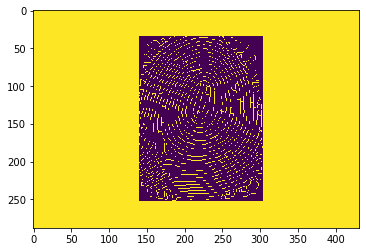

In [0]:
# Converting Image to Greyscale ....
from PIL import Image,ImageDraw
img = Image.open('skeleton.png').convert('L')
img.save('thinned_greyscale.gif')

# Loading Image ....
Img_Original = io.imread('thinned_greyscale.gif')
plt.imshow(Img_Original)

In [0]:
# To reach different pixels from given pixel ....

cells = [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1)]

In [0]:
# Function to determine type of minutiae at pixel P(i,j) ....

def minutiae_at(pixels, i, j):
    values = [pixels[i + k][j + l] for k, l in cells]

    crossings = 0
    for k in range(0, 8):
        crossings += abs(values[k] - values[k + 1])
    crossings /= 2

    if pixels[i][j] == 1:
        if crossings == 1:
            return "ending"
        if crossings == 3:
            return "bifurcation"
    return "none"

In [0]:
# Function to convert the image into pixels ....

def load_image(im):
    (x,y) = im.size
    im_load = im.load()

    result = []
    for i in range(0, x):
        result.append([])
        for j in range(0, y):
            result[i].append(im_load[i, j])

    return result

In [0]:
# Function to apply particular property to each pixel ....

def apply_to_each_pixel(pixels, f):
    for i in range(0, len(pixels)):
        for j in range(0, len(pixels[i])):
            pixels[i][j] = f(pixels[i][j])

In [0]:
# Function to show minutiae on the image ....

def show_minutiaes(im):
    pixels = load_image(im)
    apply_to_each_pixel(pixels, lambda x: 0.0 if x > 10 else 1.0)

    (x, y) = im.size
    result = im.convert("RGB")

    draw = ImageDraw.Draw(result)

    colors = {"ending" : (150, 0, 0), "bifurcation" : (0, 150, 0)}

    ellipse_size = 8
    for i in range(1, x - 1):
        for j in range(1, y - 1):
            minutiae = minutiae_at(pixels, i, j)
            if minutiae != "none":
                draw.ellipse([(i - ellipse_size, j - ellipse_size), (i + ellipse_size, j + ellipse_size)], outline = colors[minutiae])

    del draw

    return result

In [0]:
# Applying Minutiae Detection Algorithm to image ....
Minutiae_Image = show_minutiaes(img)

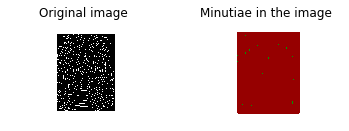

In [0]:
# Displaying the results ....
fig, ax = plt.subplots(1, 2)
ax1, ax2 = ax.ravel()
ax1.imshow(Img_Original, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.axis('off')
ax2.imshow(Minutiae_Image, cmap=plt.cm.gray)
ax2.set_title('Minutiae in the image')
ax2.axis('off')
plt.show()

In [0]:
# Saving the image ....
Minutiae_Image.save('minutiae_image.gif')

In [0]:
!wget https://raw.githubusercontent.com/Utkarsh-Deshmukh/FingerprintFeatureExtraction/master/src/removeSpuriousMinutiae.py  
!wget https://raw.githubusercontent.com/Utkarsh-Deshmukh/FingerprintFeatureExtraction/master/src/getTerminationBifurcation.py

--2020-03-08 15:58:34--  https://raw.githubusercontent.com/Utkarsh-Deshmukh/FingerprintFeatureExtraction/master/src/removeSpuriousMinutiae.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 950 [text/plain]
Saving to: ‘removeSpuriousMinutiae.py’

removeSpuriousMinut 100%[===================>]     950  --.-KB/s    in 0s      

2020-03-08 15:58:34 (192 MB/s) - ‘removeSpuriousMinutiae.py’ saved [950/950]

--2020-03-08 15:58:36--  https://raw.githubusercontent.com/Utkarsh-Deshmukh/FingerprintFeatureExtraction/master/src/getTerminationBifurcation.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HT

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


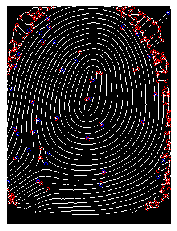

In [0]:
import cv2
import numpy as np
import skimage.morphology
import skimage
import skimage.io as io
from matplotlib import pyplot as plt

from getTerminationBifurcation import getTerminationBifurcation
from removeSpuriousMinutiae import removeSpuriousMinutiae

img = cv2.imread('fp1.bmp',0)
img = np.uint8(img>128)
    
skel = skimage.morphology.skeletonize(img)
skel = np.uint8(skel)*255;
    
mask = skel*255;


(minutiaeTerm, minutiaeBif) = getTerminationBifurcation(skel, mask);
    
minutiaeTerm = skimage.measure.label(minutiaeTerm, 8);
RP = skimage.measure.regionprops(minutiaeTerm)
minutiaeTerm = removeSpuriousMinutiae(RP, np.uint8(img), 10);
    
BifLabel = skimage.measure.label(minutiaeBif, 8);
TermLabel = skimage.measure.label(minutiaeTerm, 8);
    
minutiaeBif = minutiaeBif * 0;
minutiaeTerm = minutiaeTerm * 0;
    
(rows, cols) = skel.shape
DispImg = np.zeros((rows,cols,3), np.uint8)
DispImg[:,:,0] = skel; DispImg[:,:,1] = skel; DispImg[:,:,2] = skel;
    
    
RP = skimage.measure.regionprops(BifLabel)
for i in RP:
    (row, col) = np.int16(np.round(i['Centroid']))
    minutiaeBif[row, col] = 1;
    (rr, cc) = skimage.draw.circle_perimeter(row, col, 3);
    skimage.draw.set_color(DispImg, (rr,cc), (255,0,0));
    
    
RP = skimage.measure.regionprops(TermLabel)
for i in RP:
    (row, col) = np.int16(np.round(i['Centroid']))
    minutiaeTerm[row, col] = 1;
    (rr, cc) = skimage.draw.circle_perimeter(row, col, 3);
    skimage.draw.set_color(DispImg, (rr,cc), (0, 0, 255));


plt.imshow(DispImg)
plt.axis('off')
plt.show()